# IoT23 Data Preprocessing with 6 million samples 

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import time as timer

In [2]:
data= pd.read_csv('iot23_combined_new.csv',low_memory=False,error_bad_lines=False)

In [3]:
data.head()

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


Oh..! we have extra column.. lets get rid of it 

In [4]:
del data['Unnamed: 0']

In [5]:
data.shape

(6046623, 21)

Ok...! now we have our data with 21 features ! and around 6 million samples..! 
Its time to clean the data and bring it in good format! 

In [6]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [7]:
data['service'] = data['service'].str.replace('-','0')
data['duration'] = data['duration'].str.replace('-','0')
data['orig_bytes'] = data['orig_bytes'].str.replace('-','0')
data['resp_bytes'] = data['resp_bytes'].str.replace('-','0')

In [8]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,0,3e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [9]:
new_df=data.replace('-',0)

Let us first see if it has any null values!!!!!

ok.. so there is no null values... but there are many rows with '-' this sign.. we need to 
remove or replace this sign

But we need to make some decision on certain variables..! and drop those 
becuase they don't make sense or they can hurt the ML alogrithm as we did in our previous dataset

before that we do some Explatory data analysis 1! 

so this dataset is mixture of different types of data types..! 

ok... we have various unique values in each column as well...! 

In [13]:
data.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06,6.046623e+06
mean,1.546218e+09,3.603571e+04,1.897556e+04,5.090908e-02,4.375558e+01,1.907296e+03,5.875329e-02,6.426806e+01
std,9.546116e+06,1.776917e+04,2.273121e+04,2.108386e+01,3.534218e+04,1.392789e+06,9.774769e+01,1.422790e+05
min,1.532101e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.537541e+09,2.256800e+04,2.300000e+01,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.545433e+09,3.618500e+04,8.081000e+03,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
75%,1.551383e+09,5.084000e+04,3.721500e+04,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00
max,1.569018e+09,6.553500e+04,6.549000e+04,2.027200e+04,6.602735e+07,1.914793e+09,2.394840e+05,3.496187e+08


I don't understand this!!!!!!!

Ok so let us drop some variables now..! as per our previous practice! 
we dropped data.drop(['duration','src_ip','conn_state','src_port','ts','dst_ip','dst_port'], axis=1, inplace=True)

In [11]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,0,3e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,0,2e006,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


In [10]:
new_df=data.drop(['uid','id.orig_h','id.orig_p','id.resp_h','id.orig_p','id.resp_p','local_orig','local_resp'], axis=1)

Ref for dropping the features:https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9576115

for dropping uid .. ref Austin, Michael, "IoT Malicious Trafc Classifcation Using Machine Learning" (2021). Graduate Theses,
Dissertations, and Problem Reports. 8024.
https://researchrepository.wvu.edu/etd/8024

In [11]:
new_df.shape

(6046623, 14)

so we remain with 16 features now since we dropped 6 unnecessary features..! 

In [12]:
new_df.head()

,ts,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,tcp,0,3e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
1,1.536227e+09,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
2,1.536227e+09,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
3,1.536227e+09,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan
4,1.536227e+09,tcp,0,2e006,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,PartOfAHorizontalPortScan


Let us see the label distribution....! 

In [13]:
new_df['label'].nunique()

13

In [16]:
new_df['label'].unique()

array(['PartOfAHorizontalPortScan', 'Okiru', 'DDoS', 'C&C-HeartBeat',
       'Benign', 'C&C-Torii', 'C&C', 'C&C-FileDownload', 'Okiru-Attack',
       'Attack', 'FileDownload', 'C&C-HeartBeat-FileDownload',
       'C&C-Mirai'], dtype=object)

In [15]:
y=new_df["label"]

In [16]:
y.head()

0    PartOfAHorizontalPortScan
1    PartOfAHorizontalPortScan
2    PartOfAHorizontalPortScan
3    PartOfAHorizontalPortScan
4    PartOfAHorizontalPortScan
Name: label, dtype: object

# Separte the input variable and output variables

In [48]:
X= new_df.iloc[:,:-1]

In [49]:
X.shape

(6046623, 13)

In [50]:
y=new_df['label']

In [27]:
Yp=pd.DataFrame(y)

In [46]:
Yp.head()

,label
0,PartOfAHorizontalPortScan
1,PartOfAHorizontalPortScan
2,PartOfAHorizontalPortScan
3,PartOfAHorizontalPortScan
4,PartOfAHorizontalPortScan


In [32]:
Yn=Yp.value_counts()

In [33]:
Yn

label                     
PartOfAHorizontalPortScan     3389036
Okiru                         1313012
Benign                         688812
DDoS                           638506
C&C                             15286
C&C-HeartBeat                    1332
Attack                            538
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       13
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
dtype: int64

In [36]:
Yarray=np.array(Yn)

In [37]:
Yarray

array([3389036, 1313012,  688812,  638506,   15286,    1332,     538,
            46,      30,      13,       8,       3,       1], dtype=int64)

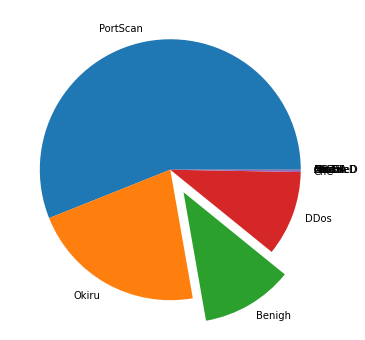

In [45]:
y =Yarray
mylabels = ["PortScan", "Okiru", "Benigh", "DDos","CnC", "CnC-H", "Attack", "FileD","Torri","CnCFileD", "HB-FileD", "OkiruA", "Mirai" ]
myexplode = [0,0,0.2,0,0,0,0,0,0,0,0,0,0]
plt.figure(figsize=(6,6))
plt.pie(y, labels = mylabels, explode=myexplode)
plt.show() 

# Separate Categorial variables from the numerical for encoding purpose

In [51]:
cat_df =X.select_dtypes(include=['object']).copy()
cat_df.head()

,proto,service,duration,orig_bytes,resp_bytes,conn_state,history
0,tcp,0,3e006,0,0,S0,S
1,tcp,0,2e006,0,0,S0,S
2,tcp,0,2e006,0,0,S0,S
3,tcp,0,2e006,0,0,S0,S
4,tcp,0,2e006,0,0,S0,S


In [52]:
cat_df.shape

(6046623, 7)

so there are only 9 categorical variables in this dataset... interesting to see duration, orig_bytes and resp bytes as categorical features...

In [53]:
num_df =X.select_dtypes(exclude=['object']).copy()
num_df.head()

,ts,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
0,1.536227e+09,0.0,2.0,80.0,0.0,0.0
1,1.536227e+09,0.0,2.0,80.0,0.0,0.0
2,1.536227e+09,0.0,2.0,80.0,0.0,0.0
3,1.536227e+09,0.0,2.0,80.0,0.0,0.0
4,1.536227e+09,0.0,2.0,80.0,0.0,0.0


In [54]:
num_df.shape

(6046623, 6)

let us label encode these categorical values into some integer values...

In [55]:
cat_df.nunique()

proto             3
service           7
duration      48920
orig_bytes      438
resp_bytes      376
conn_state       13
history         140
dtype: int64

In [25]:
type(y)

pandas.core.series.Series

In [56]:
encode_all_cat =cat_df.apply(LabelEncoder().fit_transform)

In [57]:
le=LabelEncoder()

In [58]:
Y=le.fit_transform(y)

In [59]:
Y

array([12, 12, 12, ...,  1,  1,  1])

In [60]:
X=encode_all_cat

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.20)

In [37]:
X_train.shape

(4837298, 7)

# Chi Square Test

In [38]:
from sklearn.feature_selection import chi2

In [39]:
f_p_value=chi2(X_train,Y_train)

In [40]:
p_value=pd.Series(f_p_value[1],index=X_train.columns)

In [70]:
p_value

proto         6.130461e-55
service       0.000000e+00
duration      1.000000e+00
orig_bytes    0.000000e+00
resp_bytes    0.000000e+00
conn_state    0.000000e+00
history       0.000000e+00
dtype: float64

In [71]:
p_value.sort_index(ascending=False)

service       0.000000e+00
resp_bytes    0.000000e+00
proto         6.130461e-55
orig_bytes    0.000000e+00
history       0.000000e+00
duration      1.000000e+00
conn_state    0.000000e+00
dtype: float64

Text(0.5, 1.0, 'p-values of features in IoT-23')

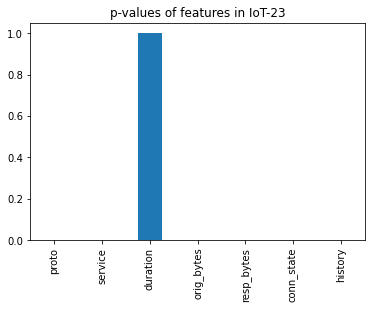

In [41]:
p_value.plot.bar()
plt.title('p-values of features in IoT-23')

In [78]:
chi_square_value=pd.Series(f_p_value[0],index=X_train.columns)

In [79]:
chi_square_value

proto         2.899170e+02
service       8.963868e+05
duration     -4.419020e+12
orig_bytes    4.842174e+07
resp_bytes    2.597800e+07
conn_state    1.941420e+06
history       5.631616e+06
dtype: float64

<AxesSubplot:>

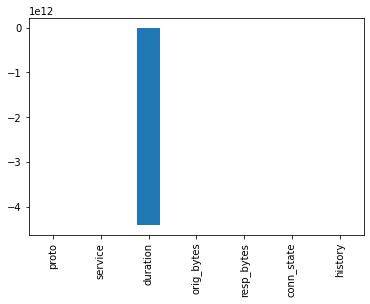

In [80]:
chi_square_value.plot.bar()

# Chi-Square with kbest method

In [40]:
from sklearn.feature_selection import chi2,SelectKBest

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=100, test_size=0.20)

In [45]:
cs = SelectKBest(score_func=chi2,k=7)
cs.fit(X_train,Y_train)
feature_score = pd.DataFrame({"features":X_train.columns, "Score":cs.scores_,"P_Value":cs.pvalues_})

In [46]:
feature_score.nlargest(n=7,columns="Score")

,features,Score,P_Value
3,orig_bytes,4.842174e+07,0.000000e+00
4,resp_bytes,2.597800e+07,0.000000e+00
6,history,5.631616e+06,0.000000e+00
5,conn_state,1.941420e+06,0.000000e+00
1,service,8.963868e+05,0.000000e+00
0,proto,2.899170e+02,6.130461e-55
2,duration,-4.419020e+12,1.000000e+00
